<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  12613940\
Student1 Name: Lisa Saleh

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [~~Section 1: Image Classification on CIFAR-100 (0 points)~~](#section-1)
- [~~Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)~~](#section-2)
- [~~Section 3: TwoLayerNet Architecture (2 points)~~](#section-3)
- [~~Section 4: ConvNet Architecture (2 points)~~](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

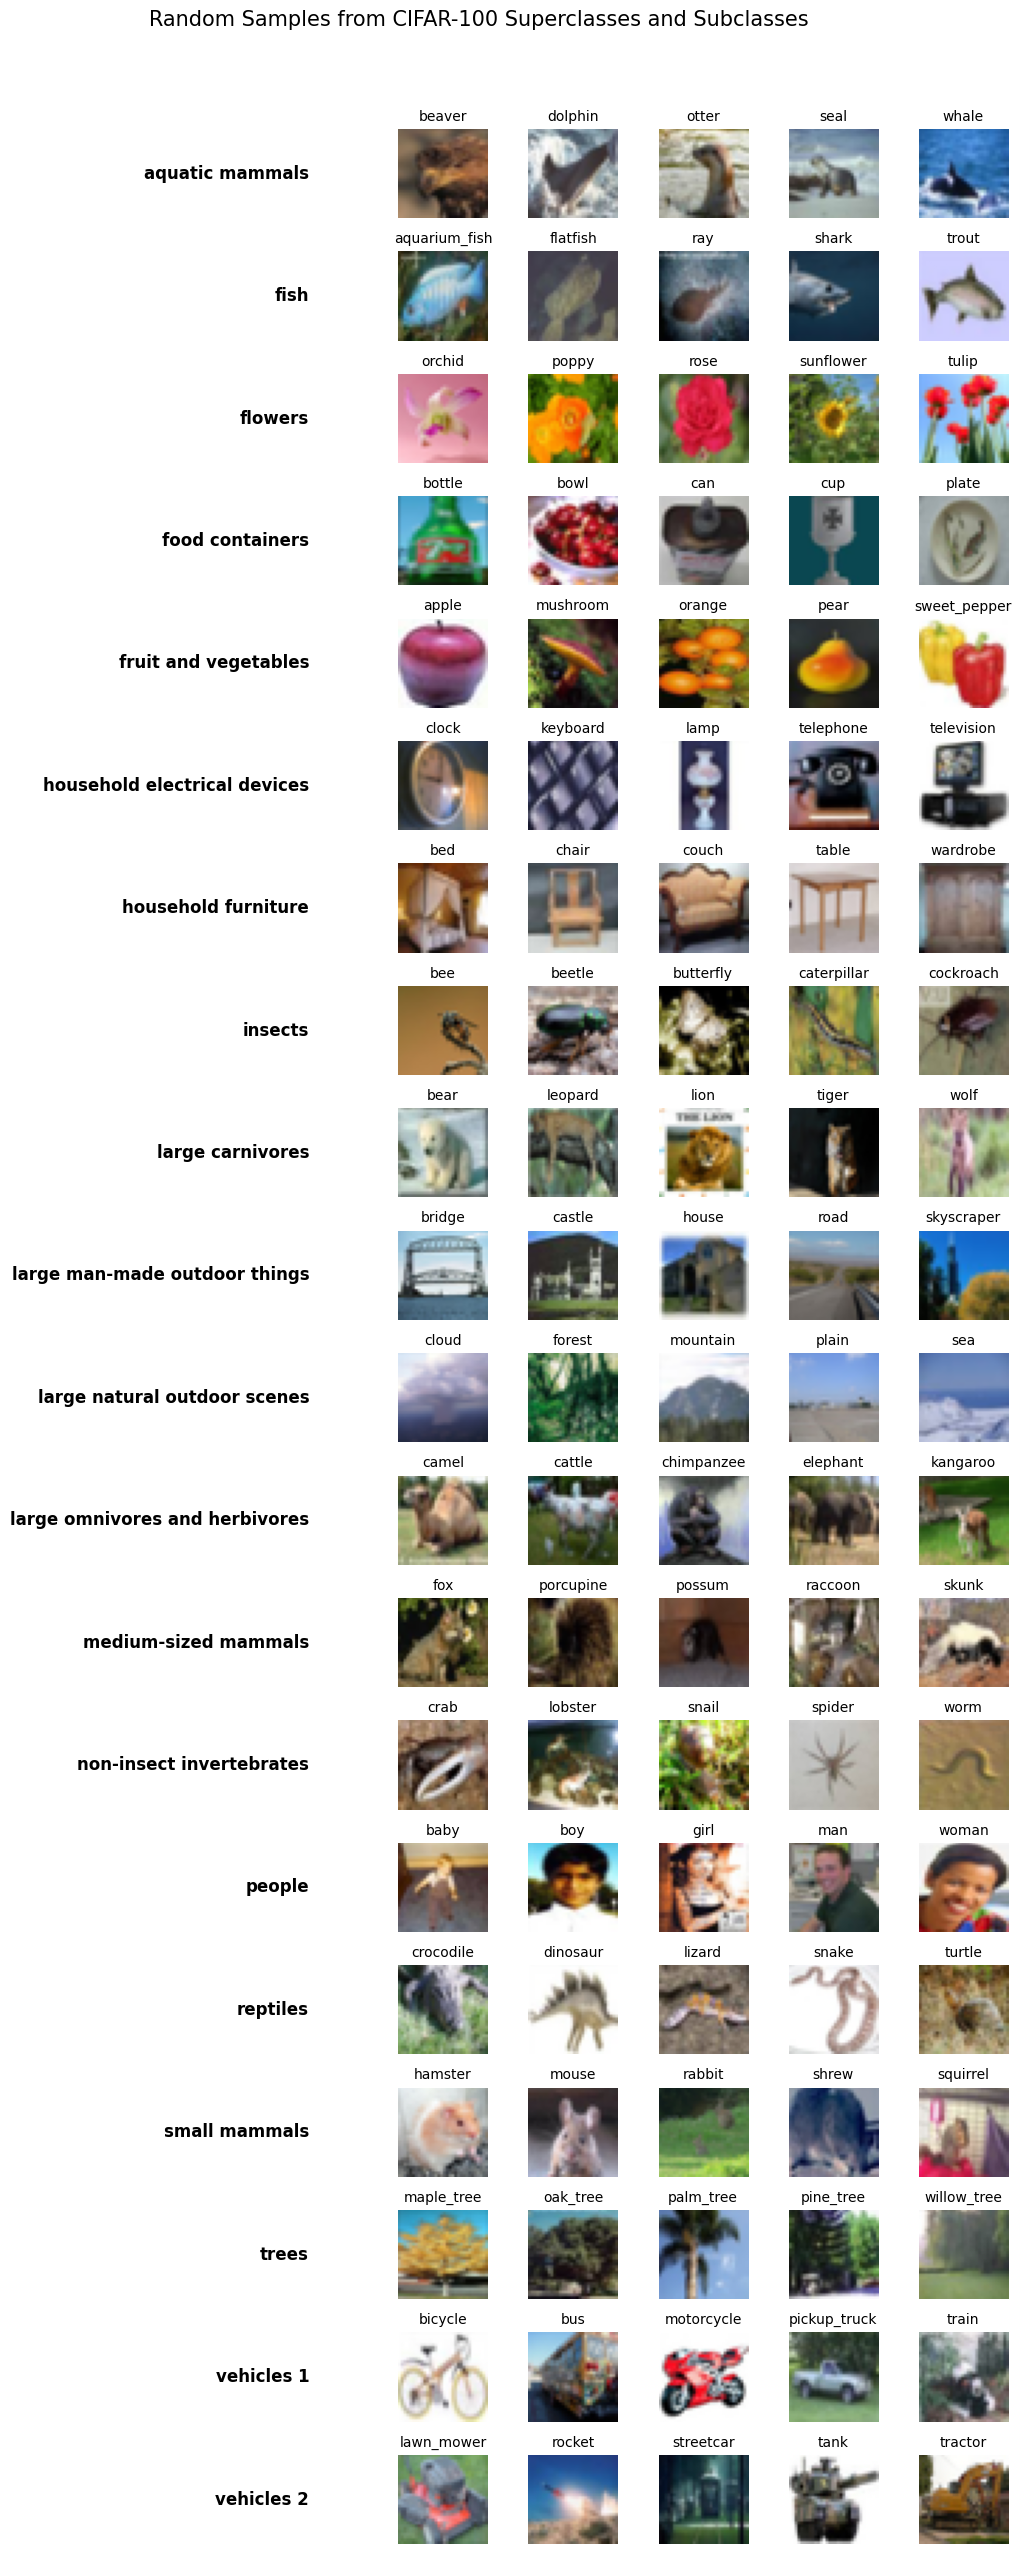

In [2]:
def visualize_cifar100():
    fig, axes = plt.subplots(len(superclasses), 5, figsize=(12, 26))
    fig.suptitle('Random Samples from CIFAR-100 Superclasses and Subclasses', fontsize=15)
    
    # Find indices for each class in train_set
    class_to_dataset_indices = {label: [] for label in class_to_idx.values()}
    for idx, (_, label) in enumerate(train_set):
        if label in class_to_dataset_indices:
            class_to_dataset_indices[label].append(idx)
    
    # Loop over superclasses and their subclass indices
    for i, (superclass, subclass_indices) in enumerate(superclass_to_indices.items()):
        for j, class_idx in enumerate(subclass_indices):
            
            # Select a random image index for this subclass
            random_idx = np.random.choice(class_to_dataset_indices[class_idx])
            img, _ = train_set[random_idx]
            subclass_name = classes[class_idx]

            # Denormalize the image for display
            img = img / 2 + 0.5 
            np_img = img.numpy()
                
            # Display the image
            ax = axes[i, j]
            ax.imshow(np.transpose(np_img, (1, 2, 0)))
            ax.axis('off')
            ax.set_title(subclass_name, fontsize=10)
        
        # Set the label for the superclass row
        axes[i, 0].text(-1.0, 0.5, superclass, ha='right', va='center', 
                        rotation=0, transform=axes[i, 0].transAxes, 
                        fontsize=12, weight='bold')

    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.tight_layout(pad=1.0, rect=[0.1, 0, 1, 0.96])  
    plt.show()

# Call the visualization function
visualize_cifar100()

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [3]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        # Initialize the parent class
        super(TwoLayerNet, self).__init__()
        
        # Define the first fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        
        # Define the second fully connected layer
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # Flatten the input tensor to 2D
        x = x.view(x.size(0), -1)
        
        # Go through the first fully connectd layer
        x = self.fc1(x)

        # Apply ReLU activation
        x = F.relu(x)
        
        # Apply the second layer to produce the output
        x = self.fc2(x)

        return x

<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [4]:
class ConvNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the convolutional neural network model.
        Args:

            None
        '''
        super(ConvNet, self).__init__()
        
        # First convolutional layer: 3 input channels (for RGB), 6 output channels, 5x5 kernel
        # Output h/w = (32-5)/1 + 1 =28; Output: 6x28x28
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)

        #After pooling; Output: 6x14x14
        
        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        # Output h/w = (14-5)/1 + 1 = 10; Output: 16x10x10
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)

        #After pooling; Output: 16x5x5
        
        # Third convolutional layer: 16 input channels, 120 output channels, 5x5 kernel
        # Output h/w = (5-5)/1 + 1 = 1; Output: 120x1x1
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        
        # Fully connected layer (F6): flattened from conv3 output to 84 units
        self.fc1 = nn.Linear(in_features=120 * 1 * 1, out_features=84)
        
        # Output layer: fully connected from 84 to 100 units
        self.fc2 = nn.Linear(in_features=84, out_features=100)  # 100 classes for CIFAR-100


    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # Apply first convolutional layer, followed by tanh activation and 2x2 average pooling
        x = torch.tanh(self.conv1(x))
        x = F.avg_pool2d(x, kernel_size=2, stride=2)
        
        # Apply second convolutional layer, followed by tanh activation and 2x2 average pooling
        x = torch.tanh(self.conv2(x))
        x = F.avg_pool2d(x, kernel_size=2, stride=2)
        
        # Apply third convolutional layer, followed by tanh (no pooling after this layer)
        x = torch.tanh(self.conv3(x))
        
        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)
        
        # Apply the first fully connected layer with ReLU activation
        x = torch.tanh(self.fc1(x))
        
        # Output layer / second fully connected layer
        x = self.fc2(x)
        
        return x

<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [5]:
# As discussed on Ed I will not do this
# https://edstem.org/eu/courses/1519/discussion/133895

class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        # YOUR CODE HERE

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        # YOUR CODE HERE

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        # YOUR CODE HERE

In [8]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    # YOUR CODE HERE

In [9]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE

In [4]:
# Still do the data augumentation for CIFAR-100:
# Define the transformations for the training set with augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomCrop(32, padding=4),  # Randomly crop images with padding
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust color slightly
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] range
])

# Define the transformations for the test set
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)
# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [5]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [6]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [7]:
def train(net, train_loader, val_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # Check if GPU is available and move the model to the GPU if possible
    # I do not have GPU but maybe you guys have it
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device) 

    try:
    
        for epoch in range(epochs):
            net.train()  # Set the model to training mode
            running_loss = 0.0
            
            # Loop over the training data
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
                
                # Zero the parameter gradients
                optimizer.zero_grad()
                
                # Forward pass
                outputs = net(inputs)
                
                loss = criterion(outputs, labels)
                
                # Backward pass and optimize
                loss.backward()
                optimizer.step()
                
                # Update running loss
                running_loss += loss.item()
            
            accuracy = validate(net, val_loader)
            print(f"Validation Accuracy after Epoch [{epoch + 1}/{epochs}]: {accuracy:.2f}%")
            
            # Calculate and print average loss for the epoch
            epoch_loss = running_loss / len(train_loader)
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}")
    except Exception as e:
        print(f"An error occurred: {e}") 

First, initialize the datasets and data loaders for both models.

In [8]:
#Again load data but now also with validation sets

# Define batch size
batch_size = 64

# Define the transformations for the training set with augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomCrop(32, padding=4),  # Randomly crop images with padding
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust color slightly
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] range
])

# Define the transformations for the validation and test sets (no augmentation)
transform_val_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-100 training set with transformations for augmentation
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)

# Load the CIFAR-100 test set with normalization only
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_val_test)

# Define the size of the validation set (10% of the training data for validation)
validation_split = 0.1
train_size = int((1 - validation_split) * len(train_set))
val_size = len(train_set) - train_size

# Split the training set into training and validation subsets
# The validation subset will use normalization-only transformations
train_subset, val_subset = random_split(train_set, [train_size, val_size])

# Manually create the validation set with non-augmented transformations
val_subset.dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_val_test)

# Create data loaders for training, validation, and test sets
train_data_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_data_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_data_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

print("Data loaders for CIFAR-100 with batch size defined.")


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 with batch size defined.


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [74]:
# Define model, criterion, and optimizer for TwoLayerNet
two_layer_net = TwoLayerNet(input_size=3*32*32, hidden_size=512, num_classes=100)  # Adjust hidden_size maybe later
criterion = nn.CrossEntropyLoss()  # Same as for LeNet-5
optimizer = optim.SGD(two_layer_net.parameters(), lr=0.01, momentum=0.9)
# Train the TwoLayerNet model
print("Training TwoLayerNet:")
train(two_layer_net, val_data_loader, train_data_loader, criterion, optimizer, epochs=10)

# Validate the TwoLayerNet model
print("Validating TwoLayerNet:")
validate(two_layer_net, test_data_loader)

Training TwoLayerNet:
Accuracy of the network on the test images: 4.81 %
Validation Accuracy after Epoch [1/10]: 4.81%
Epoch [1/10], Loss: 4.3693
Accuracy of the network on the test images: 5.60 %
Validation Accuracy after Epoch [2/10]: 5.60%
Epoch [2/10], Loss: 3.8855
Accuracy of the network on the test images: 6.28 %
Validation Accuracy after Epoch [3/10]: 6.28%
Epoch [3/10], Loss: 3.6011
Accuracy of the network on the test images: 6.63 %
Validation Accuracy after Epoch [4/10]: 6.63%
Epoch [4/10], Loss: 3.3789
Accuracy of the network on the test images: 6.67 %
Validation Accuracy after Epoch [5/10]: 6.67%
Epoch [5/10], Loss: 3.1837
Accuracy of the network on the test images: 6.75 %
Validation Accuracy after Epoch [6/10]: 6.75%
Epoch [6/10], Loss: 3.0006
Accuracy of the network on the test images: 6.49 %
Validation Accuracy after Epoch [7/10]: 6.49%
Epoch [7/10], Loss: 2.8195
Accuracy of the network on the test images: 6.66 %
Validation Accuracy after Epoch [8/10]: 6.66%
Epoch [8/10],

14.31

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [81]:
# Define model, criterion, and optimizer for ConvNet
conv_net = ConvNet()
criterion = nn.CrossEntropyLoss() # Because it makes more sense for classifycation
optimizer = optim.SGD(conv_net.parameters(), lr=0.01, momentum=0.9)

# Train the ConvNet model
print("\nTraining ConvNet:")
train(conv_net, train_data_loader, val_data_loader, criterion, optimizer, epochs=10)

# Validate the ConvNet model
print("Validating ConvNet:")
validate(conv_net, test_data_loader)


Training ConvNet:
Accuracy of the network on the test images: 7.82 %
Validation Accuracy after Epoch [1/10]: 7.82%
Epoch [1/10], Loss: 4.3208
Accuracy of the network on the test images: 10.48 %
Validation Accuracy after Epoch [2/10]: 10.48%
Epoch [2/10], Loss: 4.0209
Accuracy of the network on the test images: 12.70 %
Validation Accuracy after Epoch [3/10]: 12.70%
Epoch [3/10], Loss: 3.8917
Accuracy of the network on the test images: 13.96 %
Validation Accuracy after Epoch [4/10]: 13.96%
Epoch [4/10], Loss: 3.8065
Accuracy of the network on the test images: 15.94 %
Validation Accuracy after Epoch [5/10]: 15.94%
Epoch [5/10], Loss: 3.7229
Accuracy of the network on the test images: 16.98 %
Validation Accuracy after Epoch [6/10]: 16.98%
Epoch [6/10], Loss: 3.6504
Accuracy of the network on the test images: 17.98 %
Validation Accuracy after Epoch [7/10]: 17.98%
Epoch [7/10], Loss: 3.5955
Accuracy of the network on the test images: 18.36 %
Validation Accuracy after Epoch [8/10]: 18.36%
Ep

20.03

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [18]:
class Improved_ConvNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the convolutional neural network model.
        '''
        super(Improved_ConvNet, self).__init__()
        
        # First convolutional layer: 3 input channels (for RGB), 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(6)  # Batch normalization for conv1

        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(16)  # Batch normalization for conv2

        # Third convolutional layer: 16 input channels, 120 output channels, 5x5 kernel
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        self.bn3 = nn.BatchNorm2d(120)  # Batch normalization for conv3

        # Extra convolutional layer for smaller kernel
        self.conv4 = nn.Conv2d(in_channels=120, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)  # Batch normalization for conv4

        # Fully connected layer from flattened output to 84 units
        self.fc1 = nn.Linear(in_features=256, out_features=84)
        
        # Additional fully connected layer for further refinement
        self.fc3 = nn.Linear(in_features=84, out_features=128)
        
        # Output layer for classification
        self.fc2 = nn.Linear(in_features=128, out_features=100)  # 100 classes for CIFAR-100


    def forward(self, x):
        '''
        Defines the forward pass of the neural network.
        '''

        # Apply first convolutional layer, followed by Batch Norm, ReLU, and 2x2 average pooling
        x = torch.relu(self.bn1(self.conv1(x)))
        x = F.avg_pool2d(x, kernel_size=2, stride=2)
        
        # Apply second convolutional layer, followed by Batch Norm, ReLU, and 2x2 average pooling
        x = torch.relu(self.bn2(self.conv2(x)))
        x = F.avg_pool2d(x, kernel_size=2, stride=2)
        
        # Apply third convolutional layer, followed by Batch Norm, ReLU, and 2x2 average pooling
        x = torch.relu(self.bn3(self.conv3(x)))
        
        # Apply the fourth convolutional layer with Batch Norm and ReLU activation
        x = torch.relu(self.bn4(self.conv4(x)))

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)
        
        # Apply the first and second fully connected layers with ReLU activation
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc3(x))
        
        # Output layer
        x = self.fc2(x)
        
        return x

In [13]:
class Improved_TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        # Initialize the parent class
        super(Improved_TwoLayerNet, self).__init__()
        
        # New input transformation layer
        self.fc_input = nn.Linear(input_size, 256)

        # Define the first fully connected layer
        self.fc1 = nn.Linear(256, hidden_size)

        # New intermediate hidden layer
        self.fc_intermediate = nn.Linear(hidden_size, 256)
        
        # Define the second fully connected layer
        self.fc2 = nn.Linear(256, num_classes)

        #Adding batch normilazation !
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(256)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # Flatten the input tensor to 2D
        x = x.view(x.size(0), -1)
        
        # Input transformation layer with ReLU activation
        x = F.relu(self.fc_input(x))
        
        # First hidden layer with ReLU activation + batch normilization
        x = F.relu(self.bn1(self.fc1(x)))
        
        # Intermediate hidden layer with ReLU activation + batch normilization
        x = F.relu(self.bn2(self.fc_intermediate(x)))
        
        # Output layer
        x = self.fc2(x)

        return x

In [14]:
# Find the best learning rate first, keep batch size and hidden size fixed
# Also plots
# Fixed batch size and hidden size
batch_size = 64
hidden_size = 512

# Range of learning rates to test
learning_rates = [0.01, 0.001, 0.0005, 0.0001]
accuracy_results = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    
    # Initialize model, criterion, and optimizer
    i_twolayer = Improved_TwoLayerNet(input_size=3*32*32, hidden_size=hidden_size, num_classes=100)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(i_twolayer.parameters(), lr=0.001) # changed this to improve!
    
    # Train and validate the model
    train(i_twolayer, train_data_loader, val_data_loader, criterion, optimizer, epochs=10)
    accuracy = validate(i_twolayer, test_data_loader)
    accuracy_results.append(accuracy)

# Better plot for learning rates
# Learning rate values and corresponding accuracy results

# Create the bar plot for learning rate vs. validation accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar([str(lr) for lr in learning_rates], accuracy_results, color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
plt.title('Effect of Learning Rate on Model Performance')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy (%)')

# Set a wider y-axis range for a more zoomed-out view
plt.ylim(20, 35)  # Adjust this range as needed; 0 to 100 provides the complete percentage scale

# Add gridlines on the y-axis for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()



Training with learning rate: 0.01


KeyboardInterrupt: 

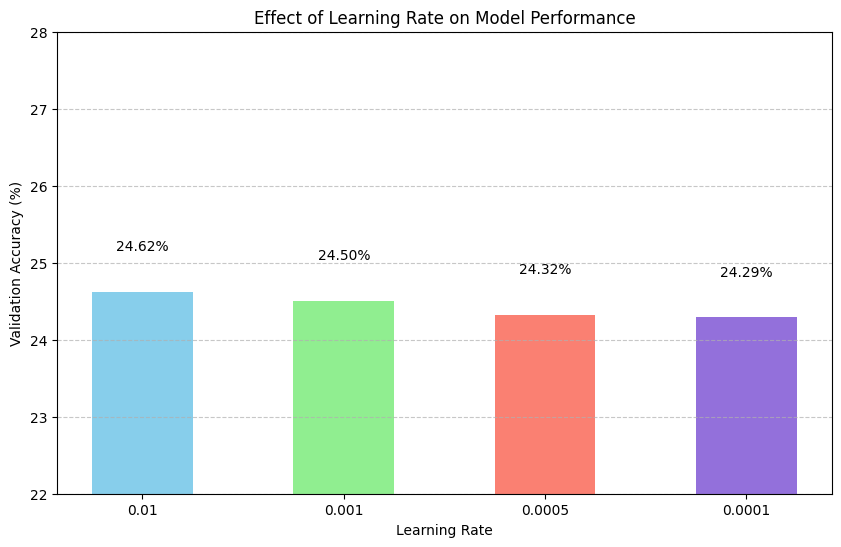

In [15]:
# Better plot for learning rates
# Learning rate values and corresponding accuracy results
learning_rates = [0.01, 0.001, 0.0005, 0.0001]
accuracy_results = [24.62, 24.50, 24.32, 24.29]  # Example accuracies for demonstration

# Create the bar plot for learning rate vs. validation accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar([str(lr) for lr in learning_rates], accuracy_results, color=['skyblue', 'lightgreen', 'salmon', 'mediumpurple'], width=0.5)
plt.title('Effect of Learning Rate on Model Performance')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy (%)')

# Set a wider y-axis range for a more zoomed-out view
plt.ylim(22, 28)  # Adjust this range as needed; 0 to 100 provides the complete percentage scale

# Add gridlines on the y-axis for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()


Training with batch size: 32
Accuracy of the network on the test images: 13.38 %
Validation Accuracy after Epoch [1/10]: 13.38%
Epoch [1/10], Loss: 4.0071
Accuracy of the network on the test images: 16.74 %
Validation Accuracy after Epoch [2/10]: 16.74%
Epoch [2/10], Loss: 3.7285
Accuracy of the network on the test images: 18.56 %
Validation Accuracy after Epoch [3/10]: 18.56%
Epoch [3/10], Loss: 3.6004
Accuracy of the network on the test images: 19.96 %
Validation Accuracy after Epoch [4/10]: 19.96%
Epoch [4/10], Loss: 3.5132
Accuracy of the network on the test images: 20.70 %
Validation Accuracy after Epoch [5/10]: 20.70%
Epoch [5/10], Loss: 3.4435
Accuracy of the network on the test images: 22.02 %
Validation Accuracy after Epoch [6/10]: 22.02%
Epoch [6/10], Loss: 3.3889
Accuracy of the network on the test images: 20.92 %
Validation Accuracy after Epoch [7/10]: 20.92%
Epoch [7/10], Loss: 3.3404
Accuracy of the network on the test images: 22.86 %
Validation Accuracy after Epoch [8/1

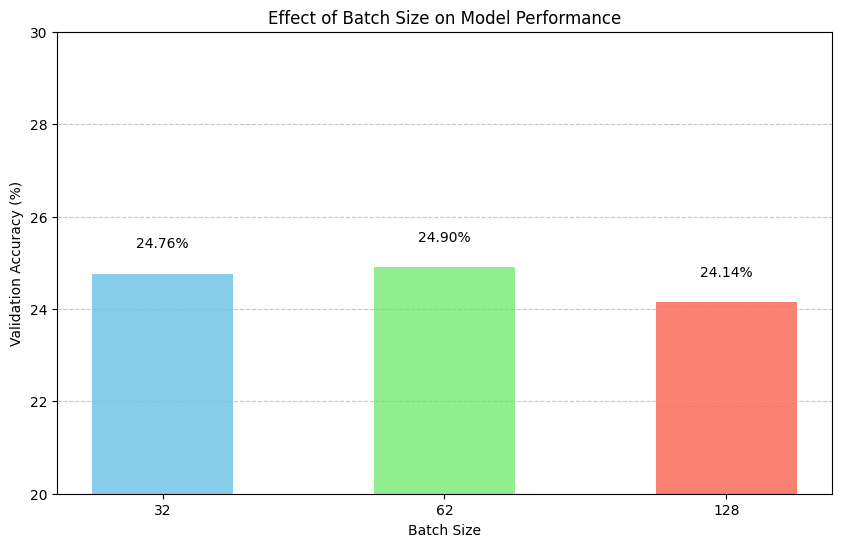

In [85]:
# The learning rate is fixed now, try to find optimal batch size
# Also plots
# Fixed batch size and hidden size
hidden_size = 512
learning_rate = 0.001

# Range of learning rates to test
batch_sizes = [32,62,128]
accuracy_results = []

for bs in batch_sizes:
    print(f"\nTraining with batch size: {bs}")

    # Create data loaders with the current batch size
    train_data_loader = DataLoader(train_subset, batch_size=bs, shuffle=True)
    val_data_loader = DataLoader(val_subset, batch_size=bs, shuffle=False)
    
    # Initialize model, criterion, and optimizer
    i_twolayer = Improved_TwoLayerNet(input_size=3*32*32, hidden_size=hidden_size, num_classes=100)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(i_twolayer.parameters(), lr=learning_rate) 
    
    # Train and validate the model
    train(i_twolayer, train_data_loader, val_data_loader, criterion, optimizer, epochs=10)
    accuracy = validate(i_twolayer, test_data_loader)
    accuracy_results.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar([str(b) for b in batch_sizes], accuracy_results, color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
plt.title('Effect of Batch Size on Model Performance')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy (%)')

# Set a wider y-axis range to zoom out and give a broader perspective
plt.ylim(20, 30)  # Adjust this range as needed; 0 to 100 gives a complete percentage scale
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()

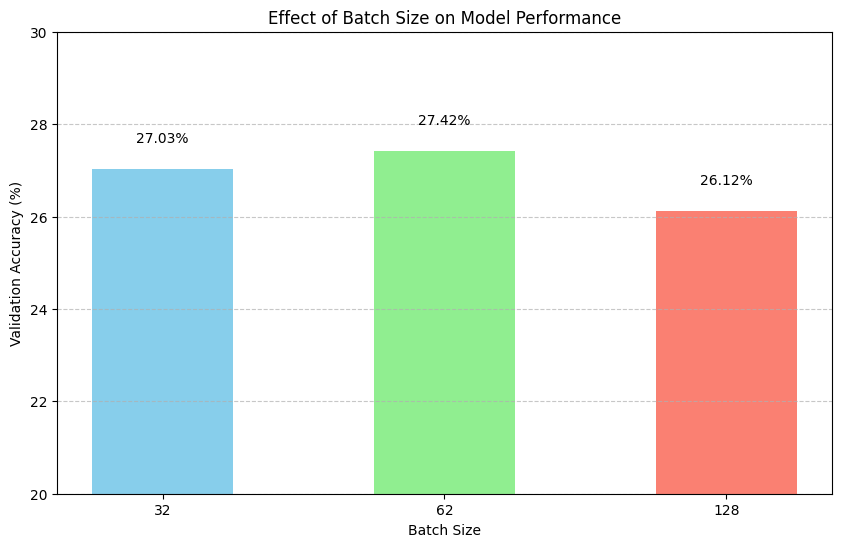

In [60]:
plt.figure(figsize=(10, 6))
bars = plt.bar([str(b) for b in batch_sizes], accuracy_results, color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
plt.title('Effect of Batch Size on Model Performance')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy (%)')

# Set a wider y-axis range to zoom out and give a broader perspective
plt.ylim(20, 30)  # Adjust this range as needed; 0 to 100 gives a complete percentage scale

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()




Training with hidden size: 256
Accuracy of the network on the test images: 14.32 %
Validation Accuracy after Epoch [1/10]: 14.32%
Epoch [1/10], Loss: 3.9879
Accuracy of the network on the test images: 17.78 %
Validation Accuracy after Epoch [2/10]: 17.78%
Epoch [2/10], Loss: 3.7023
Accuracy of the network on the test images: 18.54 %
Validation Accuracy after Epoch [3/10]: 18.54%
Epoch [3/10], Loss: 3.5782
Accuracy of the network on the test images: 19.44 %
Validation Accuracy after Epoch [4/10]: 19.44%
Epoch [4/10], Loss: 3.4863
Accuracy of the network on the test images: 20.98 %
Validation Accuracy after Epoch [5/10]: 20.98%
Epoch [5/10], Loss: 3.4149
Accuracy of the network on the test images: 21.70 %
Validation Accuracy after Epoch [6/10]: 21.70%
Epoch [6/10], Loss: 3.3651
Accuracy of the network on the test images: 21.50 %
Validation Accuracy after Epoch [7/10]: 21.50%
Epoch [7/10], Loss: 3.3208
Accuracy of the network on the test images: 21.78 %
Validation Accuracy after Epoch [8

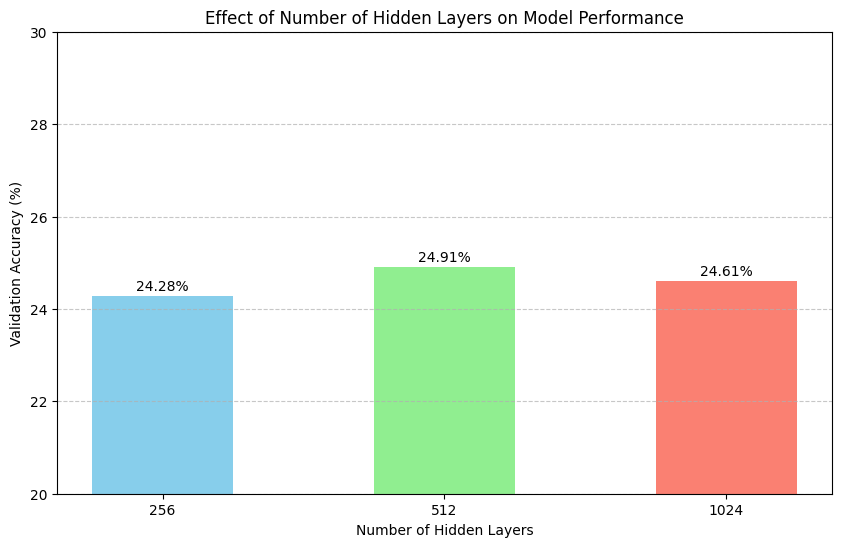

In [17]:
# The learning rate and batch size is fixed now, 
# Also plots
# Fixed batch size and hidden size
learning_rate = 0.001
batch_size = 62 

# Create data loaders with the current batch size
train_data_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_data_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

hidden_sizes = [256, 512, 1024]
accuracy_results = []

for hs in hidden_sizes:
    print(f"\nTraining with hidden size: {hs}")
    
    # Initialize model, criterion, and optimizer
    i_twolayer = Improved_TwoLayerNet(input_size=3*32*32, hidden_size=hs, num_classes=100)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(i_twolayer.parameters(), lr=learning_rate) 
    
    # Train and validate the model
    train(i_twolayer, train_data_loader, val_data_loader, criterion, optimizer, epochs=10)
    accuracy = validate(i_twolayer, test_data_loader)
    accuracy_results.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar([str(hs) for hs in hidden_sizes], accuracy_results, color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
plt.title('Effect of Number of Hidden Layers on Model Performance')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Validation Accuracy (%)')

# Set a y-axis range based on your observed values, or use a general range to zoom out
plt.ylim(20, 30)  # Adjust this range as needed; 0 to 100 provides the complete percentage scale
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()

Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [18]:
# The learning rate hidden layers and batch size is fixed now, 
# Also plots
learning_rate = 0.001
batch_size = 62
hidden_layers = 512

# Create data loader is already loaded

accuracy_results = []

# Initialize model, criterion, and optimizer
i_twolayer = Improved_TwoLayerNet(input_size=3*32*32, hidden_size=hs, num_classes=100)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(i_twolayer.parameters(), lr=learning_rate) 
    
# Train and validate the model
train(i_twolayer, train_data_loader, val_data_loader, criterion, optimizer, epochs=40)
accuracy = validate(i_twolayer, test_data_loader)
accuracy_results.append(accuracy)

Accuracy of the network on the test images: 14.14 %
Validation Accuracy after Epoch [1/40]: 14.14%
Epoch [1/40], Loss: 3.9791
Accuracy of the network on the test images: 17.84 %
Validation Accuracy after Epoch [2/40]: 17.84%
Epoch [2/40], Loss: 3.6902
Accuracy of the network on the test images: 18.96 %
Validation Accuracy after Epoch [3/40]: 18.96%
Epoch [3/40], Loss: 3.5554
Accuracy of the network on the test images: 20.78 %
Validation Accuracy after Epoch [4/40]: 20.78%
Epoch [4/40], Loss: 3.4625
Accuracy of the network on the test images: 21.32 %
Validation Accuracy after Epoch [5/40]: 21.32%
Epoch [5/40], Loss: 3.3949
Accuracy of the network on the test images: 21.34 %
Validation Accuracy after Epoch [6/40]: 21.34%
Epoch [6/40], Loss: 3.3364
Accuracy of the network on the test images: 23.20 %
Validation Accuracy after Epoch [7/40]: 23.20%
Epoch [7/40], Loss: 3.2788
Accuracy of the network on the test images: 22.96 %
Validation Accuracy after Epoch [8/40]: 22.96%
Epoch [8/40], Loss:

In [19]:
train(i_twolayer, train_data_loader, val_data_loader, criterion, optimizer, epochs=10)

Accuracy of the network on the test images: 29.32 %
Validation Accuracy after Epoch [1/10]: 29.32%
Epoch [1/10], Loss: 2.5090
Accuracy of the network on the test images: 29.20 %
Validation Accuracy after Epoch [2/10]: 29.20%
Epoch [2/10], Loss: 2.5002
Accuracy of the network on the test images: 29.84 %
Validation Accuracy after Epoch [3/10]: 29.84%
Epoch [3/10], Loss: 2.4818
Accuracy of the network on the test images: 29.90 %
Validation Accuracy after Epoch [4/10]: 29.90%
Epoch [4/10], Loss: 2.4690
Accuracy of the network on the test images: 30.12 %
Validation Accuracy after Epoch [5/10]: 30.12%
Epoch [5/10], Loss: 2.4563
Accuracy of the network on the test images: 30.10 %
Validation Accuracy after Epoch [6/10]: 30.10%
Epoch [6/10], Loss: 2.4533
Accuracy of the network on the test images: 30.26 %
Validation Accuracy after Epoch [7/10]: 30.26%
Epoch [7/10], Loss: 2.4304
Accuracy of the network on the test images: 29.56 %
Validation Accuracy after Epoch [8/10]: 29.56%
Epoch [8/10], Loss:

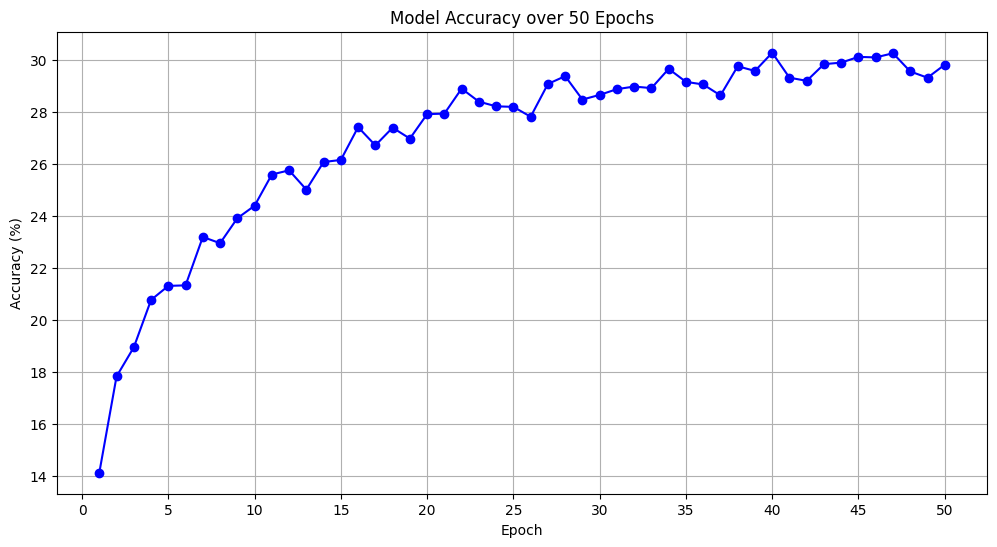

In [22]:
# Extracted accuracy values for each epoch (1-50)
accuracy_values = [
    14.14, 17.84, 18.96, 20.78, 21.32, 21.34, 23.20, 22.96, 23.92, 24.40,
    25.60, 25.76, 25.02, 26.08, 26.16, 27.42, 26.72, 27.40, 26.98, 27.92,
    27.94, 28.90, 28.40, 28.22, 28.20, 27.82, 29.08, 29.38, 28.48, 28.66,
    28.88, 28.98, 28.92, 29.66, 29.16, 29.06, 28.64, 29.76, 29.58, 30.28,
    29.32, 29.20, 29.84, 29.90, 30.12, 30.10, 30.26, 29.56, 29.32, 29.82
]

# Define the x-axis for 50 epochs
epochs = list(range(1, 51))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_values, marker='o', color='b', linestyle='-')
plt.title('Model Accuracy over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(range(0, 51, 5))  # Adjust ticks for readability
plt.grid(True)
plt.show()


In [14]:
# Saving the best version of improved Two Layer Net
torch.save(i_twolayer.state_dict(), 'i_tl_50.pth')

NameError: name 'i_twolayer' is not defined

**Optimizing CovNet**


Training with learning rate: 0.01
Accuracy of the network on the test images: 6.36 %
Validation Accuracy after Epoch [1/20]: 6.36%
Epoch [1/20], Loss: 4.2697
Accuracy of the network on the test images: 7.64 %
Validation Accuracy after Epoch [2/20]: 7.64%
Epoch [2/20], Loss: 4.0843
Accuracy of the network on the test images: 8.64 %
Validation Accuracy after Epoch [3/20]: 8.64%
Epoch [3/20], Loss: 4.0099
Accuracy of the network on the test images: 10.20 %
Validation Accuracy after Epoch [4/20]: 10.20%
Epoch [4/20], Loss: 3.9550
Accuracy of the network on the test images: 10.48 %
Validation Accuracy after Epoch [5/20]: 10.48%
Epoch [5/20], Loss: 3.9101
Accuracy of the network on the test images: 10.12 %
Validation Accuracy after Epoch [6/20]: 10.12%
Epoch [6/20], Loss: 3.8846
Accuracy of the network on the test images: 11.96 %
Validation Accuracy after Epoch [7/20]: 11.96%
Epoch [7/20], Loss: 3.8625
Accuracy of the network on the test images: 11.50 %
Validation Accuracy after Epoch [8/20

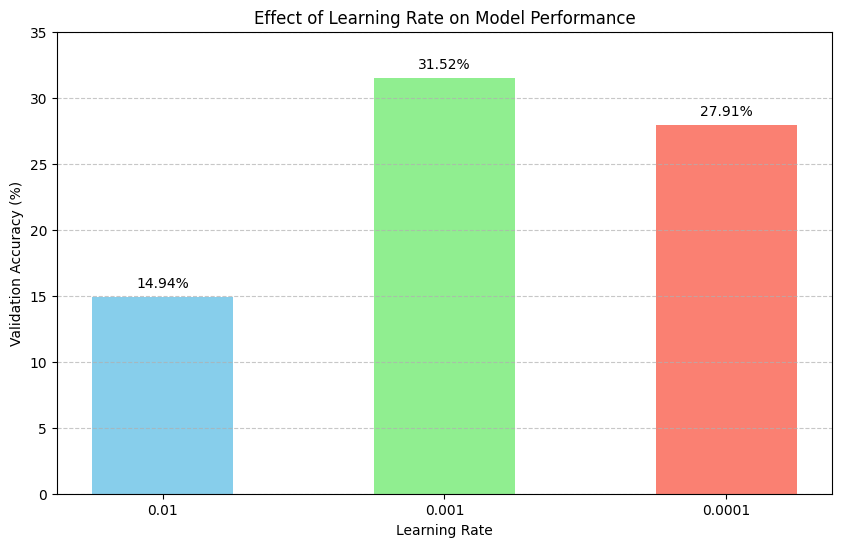

In [21]:
# Find the best learning rate first
# Also plots
batch_size = 64

# Range of learning rates to test
learning_rates = [0.01, 0.001, 0.0001]
accuracy_results = []


for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    
    # Initialize model, criterion, and optimizer
    i_covnet = Improved_ConvNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(i_covnet.parameters(), lr=lr)
    
    # Train and validate the model
    train(i_covnet, train_data_loader, val_data_loader, criterion, optimizer, epochs=20)
    accuracy = validate(i_covnet, test_data_loader)
    accuracy_results.append(accuracy)

# Better plot for learning rates
# Learning rate values and corresponding accuracy results

# Create the bar plot for learning rate vs. validation accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar([str(lr) for lr in learning_rates], accuracy_results, color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
plt.title('Effect of Learning Rate on Model Performance')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy (%)')

# Set a wider y-axis range for a more zoomed-out view
plt.ylim(0, 35)  # Adjust this range as needed; 0 to 100 provides the complete percentage scale

# Add gridlines on the y-axis for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()

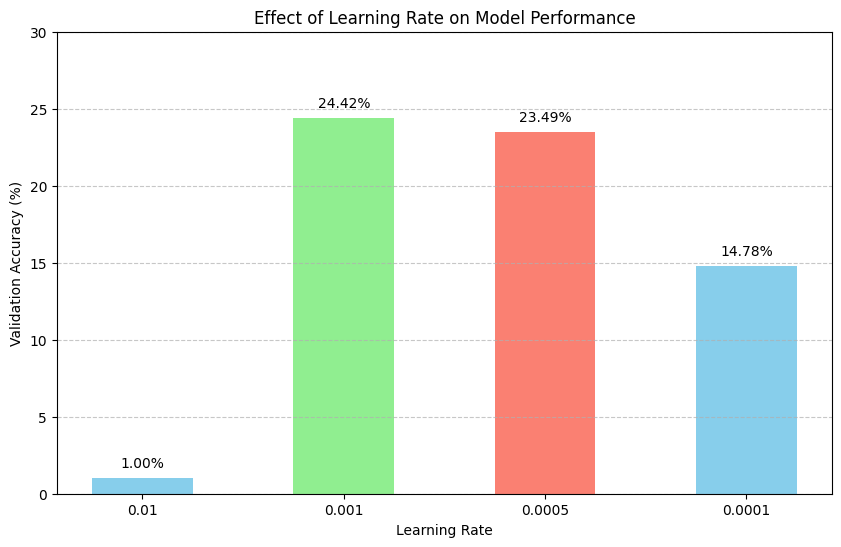

In [12]:
# Better plot for learning rates
# Learning rate values and corresponding accuracy results

# Create the bar plot for learning rate vs. validation accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar([str(lr) for lr in learning_rates], accuracy_results, color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
plt.title('Effect of Learning Rate on Model Performance')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy (%)')

# Set a wider y-axis range for a more zoomed-out view
plt.ylim(0, 30)  # Adjust this range as needed; 0 to 100 provides the complete percentage scale

# Add gridlines on the y-axis for reference
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()

In [22]:
# The learning rate is fixed now, try to find optimal batch size
# Also plots
learning_rate = 0.001

# Range of learning rates to test
batch_sizes = [32,62,128]
accuracy_results = []

for bs in batch_sizes:
    print(f"\nTraining with batch size: {bs}")

    # Create data loaders with the current batch size
    train_data_loader = DataLoader(train_subset, batch_size=bs, shuffle=True)
    val_data_loader = DataLoader(val_subset, batch_size=bs, shuffle=False)
    
    # Initialize model, criterion, and optimizer
    i_covnet = Improved_ConvNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(i_covnet.parameters(), lr=learning_rate)
    
    # Train and validate the model
    train(i_covnet, train_data_loader, val_data_loader, criterion, optimizer, epochs=20)
    accuracy = validate(i_covnet, test_data_loader)
    accuracy_results.append(accuracy)

    # Save the model after all epochs for the current batch size
    model_path = f"Improved_ConvNet_bs{bs}.pth"
    torch.save(i_covnet.state_dict(), model_path)
    print(f"Model saved as {model_path}")

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar([str(b) for b in batch_sizes], accuracy_results, color=['skyblue', 'lightgreen', 'salmon'], width=0.5)
plt.title('Effect of Batch Size on Model Performance')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy (%)')

# Set a wider y-axis range to zoom out and give a broader perspective
plt.ylim(20, 40)  # Adjust this range as needed; 0 to 100 gives a complete percentage scale
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, accuracy_results):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()


Training with batch size: 32
Accuracy of the network on the test images: 11.26 %
Validation Accuracy after Epoch [1/20]: 11.26%
Epoch [1/20], Loss: 4.0847
Accuracy of the network on the test images: 13.86 %
Validation Accuracy after Epoch [2/20]: 13.86%
Epoch [2/20], Loss: 3.7785


In [ ]:
# The learning rate hidden layers and batch size is fixed now, 
# Also plots
learning_rate = 0.001
batch_size = 62

# Initialize model, criterion, and optimizer
i_twolayer = Improved_ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(i_twolayer.parameters(), lr=learning_rate) 
    
# Train and validate the model
train(i_twolayer, train_data_loader, val_data_loader, criterion, optimizer, epochs=50)
accuracy = validate(i_twolayer, test_data_loader)
accuracy_results.append(accuracy)

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [18]:
# YOUR CODE HERE

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [25]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    # YOUR CODE HERE

In [26]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [27]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        # YOUR CODE HERE
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        # YOUR CODE HERE

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        # YOUR CODE HERE

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [21]:
# YOUR CODE HERE

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [22]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -